In [51]:
# Load training data into pandas dataframe

import pandas as pd
import numpy as np

df=pd.read_csv("../data/train.csv",index_col="Id")
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


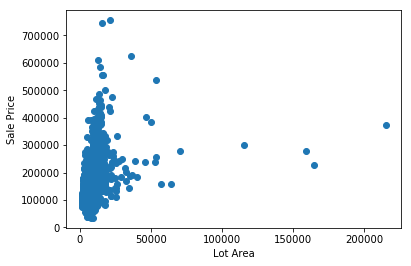

In [26]:
import matplotlib.pylab as plt
plt.scatter(df.LotArea, df.SalePrice)
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')
plt.show()

In [27]:
# find outliers. Few largest home are extremely low priced for some reason. 
#df.sort_values(by=['LotArea'],ascending=False)

In [28]:
df['TotalBuiltArea'] = df['1stFlrSF'] + df['2ndFlrSF']

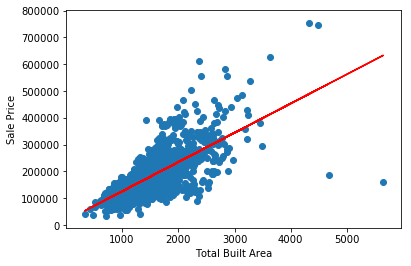

In [29]:
# Plot Total Built Area with Sales Price

import matplotlib.pylab as plt

x = df.TotalBuiltArea
y = df.SalePrice

fig, ax = plt.subplots()
fit = np.polyfit(x,y, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='red')
ax.scatter(x, y)
plt.xlabel('Total Built Area')
plt.ylabel('Sale Price')

plt.show()

In [31]:
df_with_dummies = pd.get_dummies(data=df, columns=['MSZoning', 'Street','LotConfig','Neighborhood','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType2'])
df_with_dummies[:10]

,Id,MSSubClass,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LandSlope,Condition1,...,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf
0,1,60,65.0,8450,NaN,Reg,Lvl,AllPub,Gtl,Norm,...,0,0,0,1,0,0,0,0,0,1
1,2,20,80.0,9600,NaN,Reg,Lvl,AllPub,Gtl,Feedr,...,0,1,0,0,0,0,0,0,0,1
2,3,60,68.0,11250,NaN,IR1,Lvl,AllPub,Gtl,Norm,...,0,0,1,0,0,0,0,0,0,1
3,4,70,60.0,9550,NaN,IR1,Lvl,AllPub,Gtl,Norm,...,0,0,0,1,0,0,0,0,0,1
4,5,60,84.0,14260,NaN,IR1,Lvl,AllPub,Gtl,Norm,...,1,0,0,0,0,0,0,0,0,1
5,6,50,85.0,14115,NaN,IR1,Lvl,AllPub,Gtl,Norm,...,0,0,0,1,0,0,0,0,0,1
6,7,20,75.0,10084,NaN,Reg,Lvl,AllPub,Gtl,Norm,...,1,0,0,0,0,0,0,0,0,1
7,8,60,NaN,10382,NaN,IR1,Lvl,AllPub,Gtl,PosN,...,0,0,1,0,0,1,0,0,0,0
8,9,50,51.0,6120,NaN,Reg,Lvl,AllPub,Gtl,Artery,...,0,0,0,1,0,0,0,0,0,1
9,10,190,50.0,7420,NaN,Reg,Lvl,AllPub,Gtl,Artery,...,0,0,0,1,0,0,0,0,0,1


In [44]:

X = df[["TotalBuiltArea"]]
y = df["SalePrice"]

In [45]:
from sklearn import linear_model
regr = linear_model.LinearRegression()


model = regr.fit(X,y)
regr.score(X,y)

0.51392134948598289

In [46]:
p4 = np.poly1d(np.polyfit(X, y, 4))

TypeError: expected 1D vector for x